# Fixed Effect 
### Yuanjing Zhu & Xiaoquan Liu

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Exercise 1
### Download the data and do some EDA

In [4]:
beerdata = pd.read_csv('https://media.githubusercontent.com/media/nickeubank/'+
                       'MIDS_Data/master/us_driving_fatalities.csv')
beerdata.head()

,Unnamed: 0,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,...,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
0,1,al,1982,1.37,14.4,10544.152344,50.692039,1.539379,30.355700,0.32829,...,32,309.437988,3942002.25,208999.593750,221553.43750,290000.06250,28516.0,9.7,57.799999,-0.022125
1,2,al,1983,1.36,13.7,10732.797852,52.147030,1.788991,30.333599,0.34341,...,35,341.834015,3960008.00,202000.078125,219125.46875,290000.15625,31032.0,9.6,57.900002,0.046558
2,3,al,1984,1.32,11.1,11108.791016,54.168087,1.714286,30.311501,0.35924,...,34,304.872009,3988991.75,196999.968750,216724.09375,288000.15625,32961.0,7.5,59.500004,0.062798
3,4,al,1985,1.28,8.9,11332.626953,55.271137,1.652542,30.289499,0.37579,...,45,276.742004,4021007.75,194999.734375,214349.03125,284000.31250,35091.0,7.2,60.100002,0.027490
4,5,al,1986,1.23,9.8,11661.506836,56.514496,1.609907,30.267401,0.39311,...,29,360.716003,4049993.75,203999.890625,212000.00000,263000.28125,36259.0,7.0,60.700001,0.032143


In [5]:
beerdata.describe()

,Unnamed: 0,year,spirits,unemp,income,emppop,beertax,baptist,mormon,drinkage,...,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,...,336.000000,336.000000,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,336.000000,336.000000,336.000000,336.000000
mean,168.500000,1985.000000,1.753690,7.346726,13880.184533,60.805676,0.513256,7.156925,2.801933,20.455625,...,41.377976,293.333247,4.930272e+06,2.308155e+05,2.490904e+05,3.363899e+05,37101.491151,7.528571,59.971430,0.025313
std,97.139076,2.002983,0.683575,2.533405,2253.046291,4.721656,0.477844,9.762621,9.665279,0.899025,...,42.930315,303.580749,5.073704e+06,2.298963e+05,2.493456e+05,3.453044e+05,37454.365758,1.479376,1.585048,0.043173
min,1.000000,1982.000000,0.790000,2.400000,9513.761719,42.993198,0.043311,0.000000,0.100000,18.000000,...,1.000000,24.600000,4.789997e+05,2.100002e+04,2.099996e+04,3.000016e+04,3993.000000,5.500000,57.799999,-0.123641
25%,84.750000,1983.000000,1.300000,5.475000,12085.849854,57.691426,0.208849,0.626752,0.272160,20.000000,...,13.000000,90.497749,1.545251e+06,7.174993e+04,7.696212e+04,1.035000e+05,11691.500244,6.200000,57.900002,0.001182
50%,168.500000,1985.000000,1.670000,7.000000,13763.128906,61.364660,0.352589,1.749250,0.393111,21.000000,...,30.000000,211.594002,3.310503e+06,1.630002e+05,1.709823e+05,2.409999e+05,28483.500000,7.200000,60.100002,0.032413
75%,252.250000,1987.000000,2.012500,8.900000,15175.124268,64.412504,0.651573,13.127125,0.629320,21.000000,...,49.000000,363.957748,5.751735e+06,2.705002e+05,3.083114e+05,4.130001e+05,44139.750000,9.600000,61.500000,0.056501
max,336.000000,1988.000000,4.900000,18.000000,22193.455078,71.268654,2.720764,30.355700,65.916496,21.000000,...,249.000000,2094.899902,2.831403e+07,1.172000e+06,1.321004e+06,1.892998e+06,241575.015625,9.700000,62.300003,0.142361


In [6]:
#how many states are there?
beerdata['state'].nunique()

48

* This dataset contains 48 states.

* The time frame of this dataset is from 1982 to 1988.

* A single observation (state-year) consists data of different states in different years from 1982 to 1988, i.e. each row contains data for a single state in a single year.

## Exercise 2
### Construct dependent variable: fatality rate per 10,000.

In [7]:
# compute fatalities per 10,000 people
beerdata['fat_rate'] = beerdata['fatal'] / beerdata['pop'] * 10000
beerdata['fat_rate'].describe()

count    336.000000
mean       2.040444
std        0.570194
min        0.821210
25%        1.623710
50%        1.955955
75%        2.417888
max        4.217840
Name: fat_rate, dtype: float64

## Exercise 3
### Draw a scatter plot and a fitted line showing the correlation between these two variables

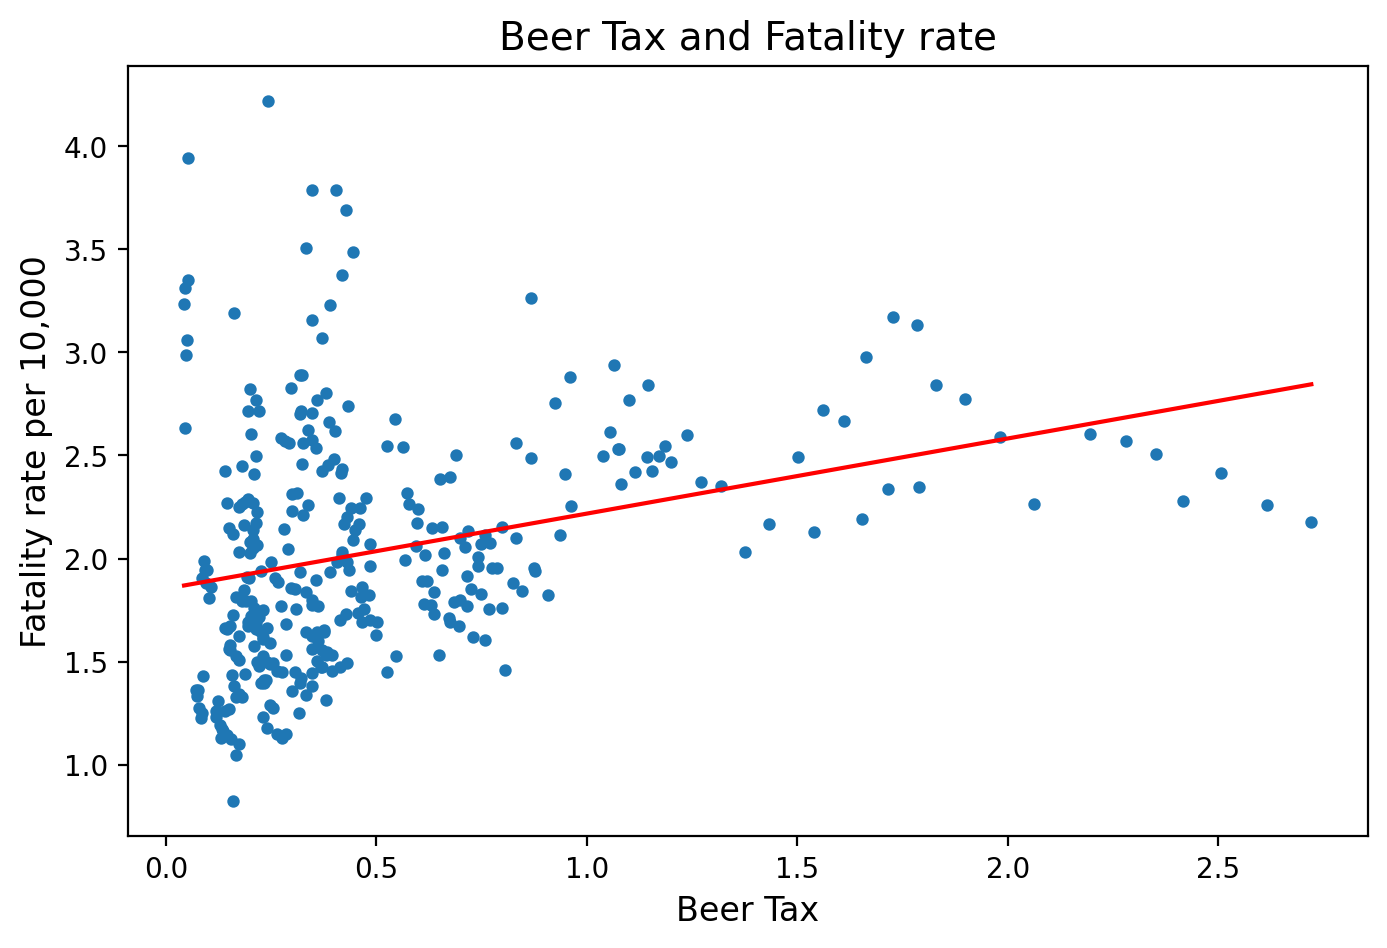

In [8]:
# Draw a scatter plot using beertax as the x-axis, and fat_rate as the y-axis
# and a fitted line
plt.figure(figsize=(8, 5), dpi=100)
plt.scatter(beerdata['beertax'], beerdata['fat_rate'], s = 12)
plt.plot(np.unique(beerdata['beertax']), np.poly1d(
    np.polyfit(beerdata['beertax'], beerdata['fat_rate'], 1))(np.unique(beerdata['beertax'])), color='red')
plt.xlabel('Beer Tax', fontsize=12)
plt.ylabel('Fatality rate per 10,000', fontsize=12)
plt.title('Beer Tax and Fatality rate', fontsize=14)
plt.show()


## Exercise 4
### Fit a simple OLS regression --- 'pooled' regression

In [9]:
pooled_model = smf.ols(formula='fat_rate ~ beertax', data=beerdata).fit()
pooled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fat_rate   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     34.39
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           1.08e-08
Time:                        20:06:52   Log-Likelihood:                -271.04
No. Observations:                 336   AIC:                             546.1
Df Residuals:                     334   BIC:                             553.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8533      0.044     42.539      0.000       1.768       1.939
beertax        0.3646      0.062      5.865      0.000       0.242       0.487
==============================================================================
Omnibus:                       66.653   Durbin-Watson:                   0.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.734
Skew:                           1.134   Prob(JB):                     3.31e-25
Kurtosis:                       4.707   Cond. No.                         2.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is a positive relationship betwwen beer tax and fatality rate per 10,000.

* The coefficient for beer tax is **0.3646** with $p-value < 0.05$, meaning that with 1 unit increase on beer tax, the fatality rate per 10,000 people will increases by 0.3646.

## Exercise 5
### Add state fixed effects

In [10]:
# add state fixed effects
fixed_model = smf.ols(formula='fat_rate ~ beertax + C(state)', data=beerdata).fit()
fixed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fat_rate   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     56.97
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.96e-120
Time:                        20:06:53   Log-Likelihood:                 107.97
No. Observations:                 336   AIC:                            -117.9
Df Residuals:                     287   BIC:                             69.09
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4776      0.313     11.098      0.000       2.861       4.094
C(state)[T.ar]    -0.6550      0.219     -2.990      0.003      -1.086      -0.224
C(state)[T.az]    -0.5677      0.267     -2.129      0.034      -1.093      -0.043
C(state)[T.ca]    -1.5095      0.304     -4.960      0.000      -2.109      -0.910
C(state)[T.co]    -1.4843      0.287     -5.165      0.000      -2.050      -0.919
C(state)[T.ct]    -1.8623      0.281     -6.638      0.000      -2.414      -1.310
C(state)[T.de]    -1.3076      0.294     -4.448      0.000      -1.886      -0.729
C(state)[T.fl]    -0.2681      0.139     -1.924      0.055      -0.542       0.006
C(state)[T.ga]     0.5246      0.184      2.852      0.005       0.163       0.887
C(state)[T.ia]    -1.5439      0.253     -6.092      0.000      -2.043      -1.045
C(state)[T.id]    -0.6690      0.258     -2.593      0.010      -1.177      -0.161
C(state)[T.il]    -1.9616      0.291     -6.730      0.000      -2.535      -1.388
C(state)[T.in]    -1.4615      0.273     -5.363      0.000      -1.998      -0.925
C(state)[T.ks]    -1.2232      0.245     -4.984      0.000      -1.706      -0.740
C(state)[T.ky]    -1.2175      0.287     -4.240      0.000      -1.783      -0.652
C(state)[T.la]    -0.8471      0.189     -4.490      0.000      -1.218      -0.476
C(state)[T.ma]    -2.1097      0.276     -7.641      0.000      -2.653      -1.566
C(state)[T.md]    -1.7064      0.283     -6.025      0.000      -2.264      -1.149
C(state)[T.me]    -1.1079      0.191     -5.797      0.000      -1.484      -0.732
C(state)[T.mi]    -1.4845      0.236     -6.290      0.000      -1.949      -1.020
C(state)[T.mn]    -1.8972      0.265     -7.157      0.000      -2.419      -1.375
C(state)[T.mo]    -1.2963      0.267     -4.861      0.000      -1.821      -0.771
C(state)[T.ms]    -0.0291      0.148     -0.196      0.845      -0.321       0.263
C(state)[T.mt]    -0.3604      0.264     -1.365      0.173      -0.880       0.159
C(state)[T.nc]    -0.2905      0.120     -2.424      0.016      -0.526      -0.055
C(state)[T.nd]    -1.6234      0.254     -6.396      0.000      -2.123      -1.124
C(state)[T.ne]    -1.5222      0.249     -6.106      0.000      -2.013      -1.032
C(state)[T.nh]    -1.2545      0.210     -5.983      0.000      -1.667      -0.842
C(state)[T.nj]    -2.1057      0.307     -6.855      0.000      -2.710      -1.501
C(state)[T.nm]     0.4264      0.254      1.677      0.095      -0.074       0.927
C(state)[T.nv]    -0.6008      0.286     -2.101      0.037      -1.164      -0.038
C(state)[T.ny]    -2.1867      0.299     -7.316      0.000      -2.775      -1.598
C(state)[T.oh]    -1.6744      0.254     -6.597      0.000      -2.174      -1.175
C(state)[T.ok]    -0.5451      0.169     -3.223      0.001      -0.878      -0.212
C(state)[T.o

* With state fixed effects, the relationship between beer tax and fatality rate per 10,000 people varies by state. Overall, there is a negative relationship betwwen beertax and fatality rate per 10,000.

* The coefficient for beer tax is **-0.6559** with $p-value < 0.05$, meaning that with 1 unit increase on beer tax, the fatality rate per 10,000 people will decreases by 0.6559 compared with the reference state(al). 

## Exercise 6
* Without fixed effects, we did not take baseline differences(fatality rate) into consideration, which happened to be correlated with treatment assignment. The positive association between beer tax and fatality rate per 10,000 people may be driven by other state-specific factors, such as the state's education level, demographics, initial fatality rate before implementing the beer tax, which are not included in the model.

*  This imply that states with high beer taxes set high beer taxes due to the fact of high fatality rate.

### Implement the entity-demeaned approach by hand

In [11]:
avg_fata_state = beerdata.groupby('state')['fat_rate'].mean()
avg_beertax_state = beerdata.groupby('state')['beertax'].mean()
# for each state, compute the difference between the fatality rate and the average fatality rate
beerdata['fat_rate_diff'] = beerdata['fat_rate'] - avg_fata_state[beerdata['state']].values
beerdata['beertax_diff'] = beerdata['beertax'] - avg_beertax_state[beerdata['state']].values

In [12]:
fixed_model = smf.ols(formula='fat_rate_diff ~ beertax_diff', data=beerdata).fit()
fixed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fat_rate_diff   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     14.19
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           0.000196
Time:                        20:06:53   Log-Likelihood:                 107.97
No. Observations:                 336   AIC:                            -211.9
Df Residuals:                     334   BIC:                            -204.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.168e-17      0.010  -2.26e-15      1.000      -0.019       0.019
beertax_diff    -0.6559      0.174     -3.767      0.000      -0.998      -0.313
==============================================================================
Omnibus:                       53.045   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.863
Skew:                           0.585   Prob(JB):                     1.81e-48
Kurtosis:                       6.786   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercise 7
### Fit the model with state fixed-effect using PanelOLS / lfe

In [13]:
# set index to state-year
beerdata = beerdata.set_index(['state', 'year'])

In [14]:
beerdata.head()

Unnamed: 0  spirits  unemp        income     emppop   beertax  \
state year                                                                  
al    1982           1     1.37   14.4  10544.152344  50.692039  1.539379   
      1983           2     1.36   13.7  10732.797852  52.147030  1.788991   
      1984           3     1.32   11.1  11108.791016  54.168087  1.714286   
      1985           4     1.28    8.9  11332.626953  55.271137  1.652542   
      1986           5     1.23    9.8  11661.506836  56.514496  1.609907   

              baptist   mormon  drinkage        dry  ...        pop1517  \
state year                                           ...                  
al    1982  30.355700  0.32829     19.00  25.006300  ...  208999.593750   
      1983  30.333599  0.34341     19.00  22.994200  ...  202000.078125   
      1984  30.311501  0.35924     19.00  24.042601  ...  196999.968750   
      1985  30.289499  0.37579     19.67  23.633900  ...  194999.734375   
      1986  30.267401  0.39311     21.00  23.464701  ...  203999.890625   

                 pop1820       pop2124 milestot unempus   emppopus       gsp  \
state year                                                                     
al    1982  221553.43750  290000.06250  28516.0     9.7  57.799999 -0.022125   
      1983  219125.46875  290000.15625  31032.0     9.6  57.900002  0.046558   
      1984  216724.09375  288000.15625  32961.0     7.5  59.500004  0.062798   
      1985  214349.03125  284000.31250  35091.0     7.2  60.100002  0.027490   
      1986  212000.00000  263000.28125  36259.0     7.0  60.700001  0.032143   

            fat_rate  fat_rate_diff  beertax_diff  
state year                                         
al    1982   2.12836      -0.284267     -0.084413  
      1983   2.34848      -0.064147      0.165198  
      1984   2.33643      -0.076197      0.090493  
      1985   2.19348      -0.219147      0.028750  
      1986   2.66914       0.256513     -0.013886  

[5 rows x 36 columns]

In [15]:
# using panelOLS with state fixed effects
from linearmodels.panel import PanelOLS
panel_model = PanelOLS(beerdata['fat_rate'], beerdata['beertax'], entity_effects=True).fit()
panel_model.summary

Dep. Variable:,fat_rate,R-squared:,0.0407
Estimator:,PanelOLS,R-squared (Between):,-0.3805
No. Observations:,336,R-squared (Within):,0.0407
Date:,"Thu, Feb 23 2023",R-squared (Overall):,-0.3775
Time:,20:06:53,Log-likelihood,107.97
Cov. Estimator:,Unadjusted,,
,,F-statistic:,12.190
Entities:,48,P-value,0.0006
Avg Obs:,7.0000,Distribution:,"F(1,287)"
Min Obs:,7.0000,,
Max Obs:,7.0000,F-statistic (robust):,12.190


* The coefficient for beertax is the same as the result in Exercise 6 but the standard deviation varies a little bit. 

* The coefficient for beertax is -0.6559 with $p-value < 0.05$, meaning that on average, within each state, with 1 unit increase on beer tax, the fatality rate per 10,000 people will decreases by 0.6559.

## Exercise 8
### Add fixed effects for both the state and the year, as well as the other covariates

In [16]:
beerdata.columns

Index(['Unnamed: 0', 'spirits', 'unemp', 'income', 'emppop', 'beertax',
       'baptist', 'mormon', 'drinkage', 'dry', 'youngdrivers', 'miles',
       'breath', 'jail', 'service', 'fatal', 'nfatal', 'sfatal', 'fatal1517',
       'nfatal1517', 'fatal1820', 'nfatal1820', 'fatal2124', 'nfatal2124',
       'afatal', 'pop', 'pop1517', 'pop1820', 'pop2124', 'milestot', 'unempus',
       'emppopus', 'gsp', 'fat_rate', 'fat_rate_diff', 'beertax_diff'],
      dtype='object')

In [17]:
# add youngdrivers to the model
# no categorical variables ---> no need to add an intercept to aid in interpretation of controls
pandel_model_2 = PanelOLS(beerdata['fat_rate'], beerdata[[
    'beertax','spirits','youngdrivers','miles']], entity_effects=True, time_effects=True)
#clusered standard errors
pandel_model_2 = pandel_model_2.fit(cov_type='clustered', cluster_entity=True)
pandel_model_2.summary

Dep. Variable:,fat_rate,R-squared:,0.2443
Estimator:,PanelOLS,R-squared (Between):,0.7924
No. Observations:,336,R-squared (Within):,-0.4508
Date:,"Thu, Feb 23 2023",R-squared (Overall):,0.7835
Time:,20:06:53,Log-likelihood,155.93
Cov. Estimator:,Clustered,,
,,F-statistic:,22.471
Entities:,48,P-value,0.0000
Avg Obs:,7.0000,Distribution:,"F(4,278)"
Min Obs:,7.0000,,
Max Obs:,7.0000,F-statistic (robust):,8.1440


* By adding year-fixed effects, we are able to control for variables that are constant across entities(states) but vary over time. For example, there may be some nationwide policies and laws on transportation or macroeconomic conditions. This model eliminates omitted variable bias caused by excluding unobserved variables that evolve over time but are constant across entities.

* We added 'spirits','youngdrivers', and 'miles' as important covariates since more consumption of spirits may lead to more traffic deaths; young drivers are less cautious on the road and may cause more traffic accidents and traffic deaths compared to other drivers; and longer vehicle miles may also cause some safety issues on the vehicle and thus have a positive relationship with traffic deaths.

* The coefficient for beertax is -0.4561, meaning that after controlling for states and time, with 1 unit increase on beer tax, the fatality rate per 10,000 people will decreases by 0.4561, holding all other variables constant. With $p-value> 0.05$, this difference is not statistically significant.

* The coefficient for spirits is 1.0128, meaning that after controlling for states and time, with 1 unit increase on spirits consumption, the fatality rate per 10,000 people will increases by 1.0128, holding all other variables constant. With $p-value< 0.05$, this difference is statistically significant.

* The coefficient for youngdrivers is 1.6682, meaning that after controlling for states and time, with 1 unit increase on youngdrivers, the fatality rate per 10,000 people will increase by 1.6682, holding all other variables constant. With $p-value> 0.05$, this difference is not statistically significant.

* The coefficient for miles is 1.88e-05, meaning that after controlling for states and time, with 1 unit increase on vehicle miles, the fatality rate per 10,000 people will increase by 1.88e-052, holding all other variables constant. With $p-value> 0.05$, this difference is not statistically significant.